<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [410]:
df = pd.read_csv('Likes.csv',index_col='userid')
df.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,
1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 1098638 to 1346608
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    2104 non-null   int64 
 1   dob_day                2104 non-null   int64 
 2   dob_year               2104 non-null   int64 
 3   dob_month              2104 non-null   int64 
 4   gender                 2102 non-null   object
 5   tenure                 2104 non-null   int64 
 6   friend_count           2104 non-null   int64 
 7   friendships_initiated  2104 non-null   int64 
 8   likes                  2104 non-null   int64 
 9   likes_received         2104 non-null   int64 
 10  mobile_likes           2104 non-null   int64 
 11  mobile_likes_received  2104 non-null   int64 
 12  www_likes              2104 non-null   int64 
 13  www_likes_received     2104 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 246.6+ KB


In [412]:
df.isna().sum()

age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   2
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [413]:
df = df.dropna(subset=['gender'],axis=0)

In [414]:
df.isna().sum()

age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

### `1.  Select more than five columns for EDA`

In [415]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.head()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,
1098638,13,2,2000,2,0,0,0,1,0,0,0,1,0
2063204,14,22,1999,1,104,0,0,1,0,0,0,1,0
1579594,19,18,1994,10,212,0,0,1,0,0,0,1,0
1979672,21,1,1992,1,328,0,0,1,0,0,0,1,0
1344831,23,10,1990,2,580,0,0,1,0,0,0,1,0


In [416]:
df_categ = df.select_dtypes(exclude=np.number)
df_categ.head()

,gender
userid,
1098638,male
2063204,male
1579594,female
1979672,male
1344831,male


In [417]:
ss = StandardScaler()

In [418]:
for i in df_numeric.columns:
    print('column name: ',i,'--','skewness: ',df_numeric[i].skew())

column name:  age -- skewness:  1.6307256057199968
column name:  dob_day -- skewness:  0.24179168831601616
column name:  dob_year -- skewness:  -1.6307256057199984
column name:  dob_month -- skewness:  0.158793939711598
column name:  tenure -- skewness:  2.038302285466195
column name:  friend_count -- skewness:  0.3396388811129769
column name:  friendships_initiated -- skewness:  0.6939669866214988
column name:  likes -- skewness:  24.947660619875464
column name:  likes_received -- skewness:  18.409402972023273
column name:  mobile_likes -- skewness:  28.551561181225225
column name:  mobile_likes_received -- skewness:  18.55799536605876
column name:  www_likes -- skewness:  16.933760229475237
column name:  www_likes_received -- skewness:  17.05153605445564


<Figure size 432x288 with 0 Axes>

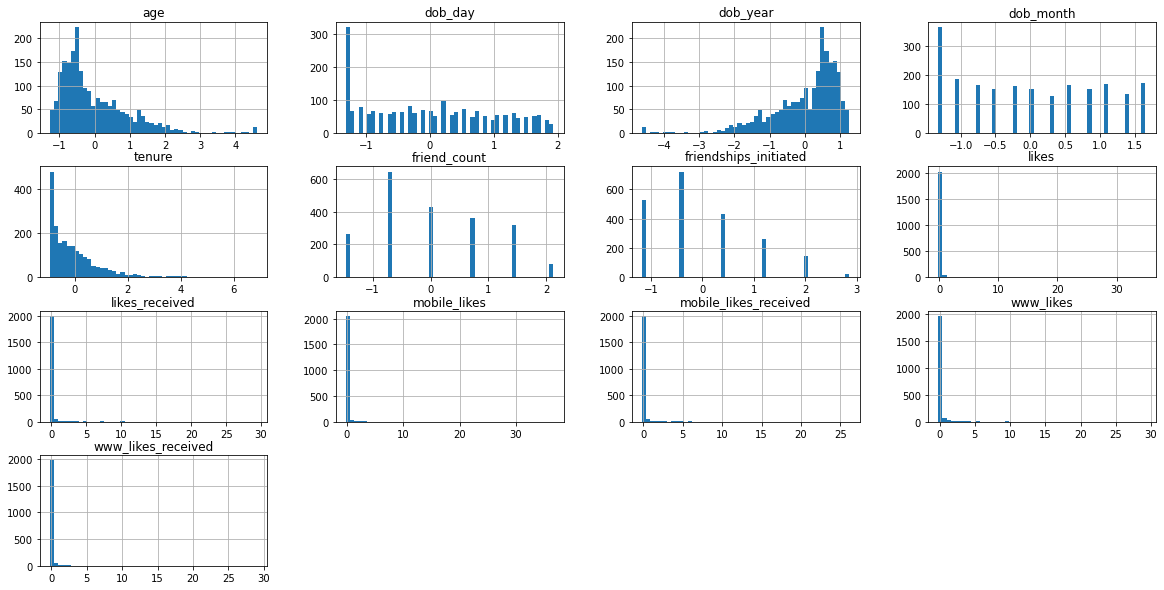

In [419]:
plt.tight_layout()

df_numeric_scaled = ss.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(df_numeric_scaled,columns=df_numeric.columns)
_ =df_numeric_scaled.hist(figsize=(20,10),bins=50)


<Figure size 432x288 with 0 Axes>

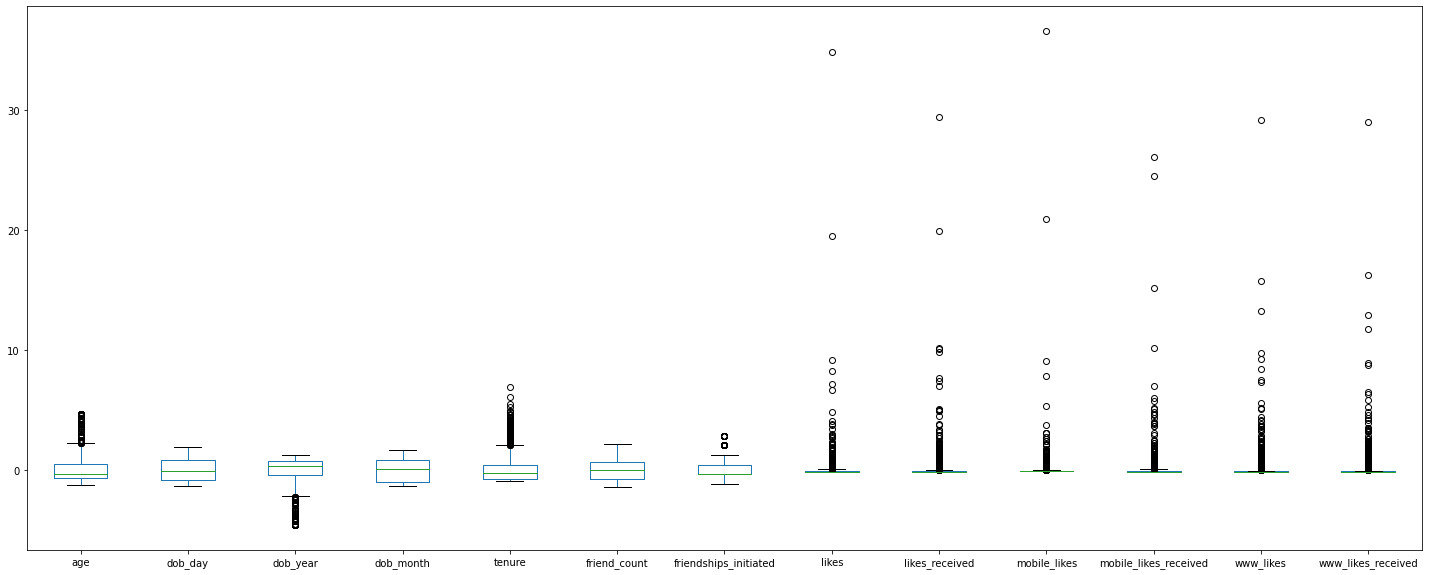

In [420]:
plt.tight_layout()

df_numeric_scaled = ss.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(df_numeric_scaled,columns=df_numeric.columns)
_=df_numeric_scaled.plot(kind='box',figsize=(25,10))

<AxesSubplot:xlabel='gender', ylabel='count'>

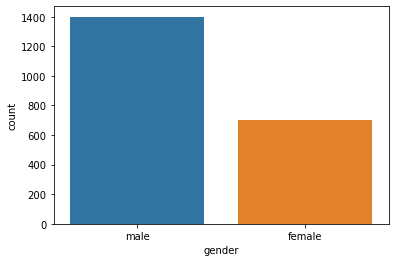

In [421]:
sns.countplot(df_categ['gender'])

Inference:
* From the above histograms and skewness calculation , we can infer that all of the columns except dob year is right skewed, only dob_yea is left skewed.

* From the box-plot , we can infer that for all columns the ouliers are present in the right side of the distribution except for dob_year the outliers are in the left side of the distribution. 

#### `2.  Plot the heat map `

<AxesSubplot:>

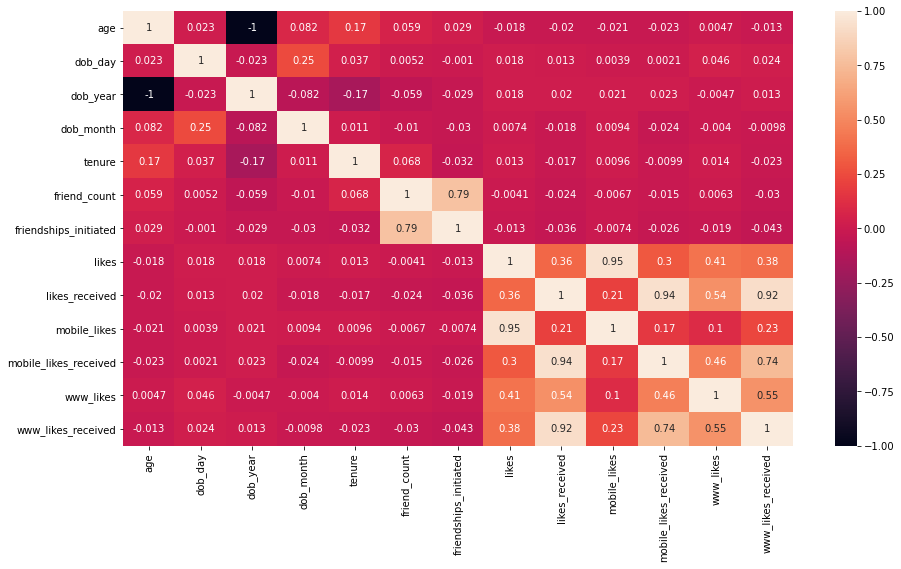

In [422]:
plt.figure(figsize=(15,8))
sns.heatmap(df_numeric.corr(),annot=True)

In [423]:
df_numeric.columns

Index(['age', 'dob_day', 'dob_year', 'dob_month', 'tenure', 'friend_count',
       'friendships_initiated', 'likes', 'likes_received', 'mobile_likes',
       'mobile_likes_received', 'www_likes', 'www_likes_received'],
      dtype='object')

<AxesSubplot:>

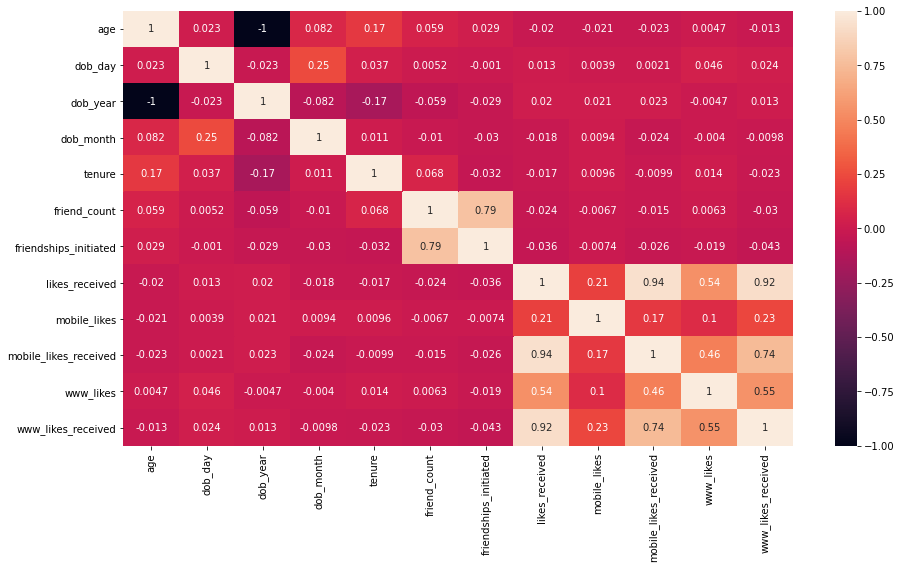

In [424]:
df_numeric_feat = df_numeric.drop('likes',axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(df_numeric_feat.corr(),annot=True)

Inference:
*  The columns that are significantly correlated with dependent varibles are: www_likes_received, www_likes,mobile_likes_received,mobile_likes,likes_received.
* The columns that are significantly correlated wih each others are:likes_recieved,mobile_likes_recieved,www_likes_recieved.

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

In [425]:
df = df.reset_index(drop=True)

In [426]:
df1 = pd.get_dummies(df['gender'],drop_first=True)

In [427]:
df = pd.concat([df,df1],axis=1)

In [428]:
df = df.drop('gender',axis=1)

In [429]:
df.head()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,male
0,13,2,2000,2,0,0,0,1,0,0,0,1,0,1
1,14,22,1999,1,104,0,0,1,0,0,0,1,0,1
2,19,18,1994,10,212,0,0,1,0,0,0,1,0,0
3,21,1,1992,1,328,0,0,1,0,0,0,1,0,1
4,23,10,1990,2,580,0,0,1,0,0,0,1,0,1


In [430]:
y = df['likes']

X = df.drop('likes',axis=1)

In [431]:
ss = StandardScaler()
Xs = ss.fit_transform(X)
Xs = pd.DataFrame(Xs,columns=X.columns)

In [432]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs,y,test_size=0.3,random_state=1)

In [433]:
X.shape

(2102, 13)

In [434]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1471, 13), (631, 13), (1471,), (631,))

In [435]:
X_train = X_train.reset_index(drop=True) 
y_train = y_train.reset_index(drop=True) 

In [436]:
print('Train Data percentage:',round(len(X_train)/len(X)*100),'%')

Train Data percentage: 70 %


In [437]:
print('Test Data percentage:',round(len(X_test)/len(X)*100),'%')

Test Data percentage: 30 %


<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



In [438]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() 

model.fit(X_train,y_train)

LinearRegression()

In [439]:
y_pred = model.predict(X_test)

In [440]:
from sklearn.metrics import mean_squared_error,r2_score

In [441]:
rmse = mean_squared_error(y_test,y_pred,squared=False)

r2_score = r2_score(y_test,y_pred)

print('RMSE on the test set :', rmse)
print('r2_score on the test set :', r2_score)


RMSE on the test set : 3.6796183251132525e-13
r2_score on the test set : 1.0


In [442]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

lir = LinearRegression()
rfe = RFE(lir)

params = [{'n_features_to_select': list(range(4, 30))}]

gsearch = GridSearchCV(rfe, param_grid=params, scoring='r2', cv=10, return_train_score=True)
gsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [4, 5, 6, 7, 8, 9, 10, 11, 12,
                                                   13, 14, 15, 16, 17, 18, 19,
                                                   20, 21, 22, 23, 24, 25, 26,
                                                   27, 28, 29]}],
             return_train_score=True, scoring='r2')

In [443]:
gsearch.best_params_

{'n_features_to_select': 4}

In [444]:
rfe_model = RFE(lir,n_features_to_select=4)
rfe_model = rfe_model.fit(X_train,y_train)

rf = pd.DataFrame(rfe_model.ranking_, index=X_train.columns, columns=['rank'])
rf.sort_values(by='rank').head(4)


,rank
likes_received,1
mobile_likes,1
mobile_likes_received,1
www_likes,1


In [445]:
df.head()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,male
0,13,2,2000,2,0,0,0,1,0,0,0,1,0,1
1,14,22,1999,1,104,0,0,1,0,0,0,1,0,1
2,19,18,1994,10,212,0,0,1,0,0,0,1,0,0
3,21,1,1992,1,328,0,0,1,0,0,0,1,0,1
4,23,10,1990,2,580,0,0,1,0,0,0,1,0,1


In [446]:
y = df['likes']

X = df[['age','likes_received','mobile_likes','www_likes']]

In [447]:
ss = StandardScaler()
Xs = ss.fit_transform(X)
Xs = pd.DataFrame(Xs,columns=X.columns)
Xs = sm.add_constant(Xs)


In [448]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs,y,test_size=0.3,random_state=1)

In [449]:
sig_model = sm.OLS(y_train,X_train).fit()

sig_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.738e+32
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:02:57   Log-Likelihood:                 41765.
No. Observations:                1471   AIC:                        -8.352e+04
Df Residuals:                    1466   BIC:                        -8.349e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             27.6694   2.95e-15   9.37e+15      0.000      27.669      27.669
age             2.576e-14   3.07e-15      8.397      0.000    1.97e-14    3.18e-14
likes_received  2.487e-14    3.9e-15      6.377      0.000    1.72e-14    3.25e-14
mobile_likes     155.2860      3e-15   5.18e+16      0.000     155.286     155.286
www_likes         53.7584   3.44e-15   1.56e+16      0.000      53.758      53.758
==============================================================================
Omnibus:                     3593.022   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35425953.958
Skew:                         -24.387   Prob(JB):                         0.00
Kurtosis:                     761.690   Cond. No.                         1.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

#### 1. Linearity of the model

* H0: fit of model using full sample = fit of model using a central subset (linear relationship)
* H1: fit of model using full sample is worse compared  to fit of model using a central subset 

In [450]:
y = df['likes']

X = df[['age','likes_received','mobile_likes','www_likes']]

Xc= sm.add_constant(X)

In [451]:
sig_model = sm.OLS(y,Xc).fit()

sig_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.224e+32
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:02:57   Log-Likelihood:                 58602.
No. Observations:                2102   AIC:                        -1.172e+05
Df Residuals:                    2097   BIC:                        -1.172e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            2.22e-14   9.54e-15      2.328      0.020     3.5e-15    4.09e-14
age            -5.329e-15   2.55e-16    -20.859      0.000   -5.83e-15   -4.83e-15
likes_received   2.22e-16   1.11e-16      1.993      0.046    3.55e-18    4.41e-16
mobile_likes       1.0000   2.72e-17   3.68e+16      0.000       1.000       1.000
www_likes          1.0000   9.12e-17    1.1e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     2893.756   Durbin-Watson:                   0.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1725618.561
Skew:                          -7.387   Prob(JB):                         0.00
Kurtosis:                     142.586   Cond. No.                         363.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [452]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(sig_model)

(31.214557207559672, 0.0)

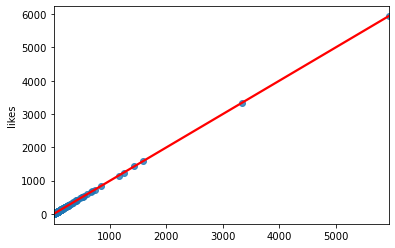

In [453]:
y_pred = sig_model.predict(Xc)

sns.regplot(x=y_pred, y=y, lowess=True, line_kws={'color':'red'})
plt.show()

Inference:
* Fit of full model can not be represented by fit of central subset.

#### 2. Homoscedasticity (equal variance) of residuals

* H0: Variance is constant across the range of data 
* H1: Variance is not constant across the range of data 

In [454]:
import statsmodels.stats.api as sms

residuals = sig_model.resid
y_pred = sig_model.predict(Xc)

sms.het_goldfeldquandt(y=residuals, x=Xc)

(0.5126981591116522, 0.9999999999999999, 'increasing')

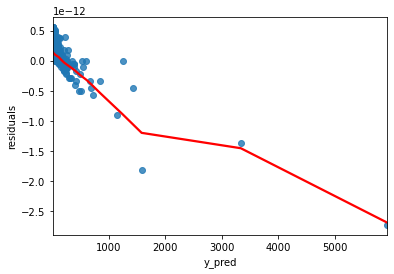

In [455]:
sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})
plt.xlabel('y_pred')
plt.ylabel('residuals')
plt.show()

Inference:
* Variance is constant across range of data.

#### 3. Normality of residuals 

* H0: Data is normal
* H1: Data is not normal

In [456]:
import scipy.stats as stats

In [457]:
print(stats.jarque_bera(residuals))

Jarque_beraResult(statistic=1725618.560579149, pvalue=0.0)


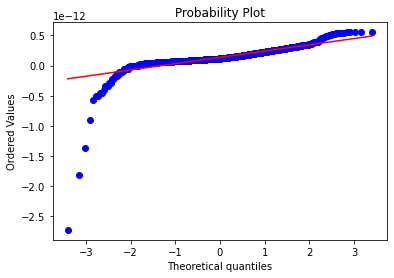

In [458]:
stats.probplot(residuals, plot=plt)
plt.show()

Inference:
* Residuals are not normally distributed.

#### 4. Identifying Outliers/influential Cases

In [489]:
features=[]
skewness=[]
for i in df_numeric.columns:
    features.append(i)
    skewness.append(df[i].skew())
    
    

In [502]:
df_ol = pd.DataFrame([features,skewness]).T
df_ol.columns=['features','skewness']
df_ol.sort_values('skewness')


,features,skewness
2,dob_year,-1.63073
3,dob_month,0.158794
1,dob_day,0.241792
5,friend_count,0.339639
6,friendships_initiated,0.693967
0,age,1.63073
4,tenure,2.0383
11,www_likes,16.9338
12,www_likes_received,17.0515
8,likes_received,18.4094


In [507]:
print('List of features having significant skewness due to outliers:','\n',list(df_ol[df_ol.skewness>5].features))

List of features having significant skewness due to outliers: 
 ['likes', 'likes_received', 'mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']


<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

In [459]:
df.shape

(2102, 14)

In [460]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

from sklearn.model_selection import KFold

lir = LinearRegression()
rfe = RFE(lir)

params = [{'n_features_to_select': list(range(1, 30))}]
lir = LinearRegression(fit_intercept=True)
kfold = KFold(n_splits=3, shuffle=True, random_state=1)

gsearch = GridSearchCV(rfe, param_grid=params, scoring='r2', cv=kfold, return_train_score=True)
gsearch.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29]}],
             return_train_score=True, scoring='r2')

In [461]:
gsearch.best_params_

{'n_features_to_select': 2}

In [468]:
rfe_model = RFE(lir,n_features_to_select=2)
rfe_model = rfe_model.fit(X_train,y_train)

rf = pd.DataFrame(rfe_model.ranking_, index=X_train.columns, columns=['rank'])
rf.sort_values(by='rank').head()


,rank
mobile_likes,1
www_likes,1
likes_received,2
age,3
const,4


In [463]:
df.head()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,male
0,13,2,2000,2,0,0,0,1,0,0,0,1,0,1
1,14,22,1999,1,104,0,0,1,0,0,0,1,0,1
2,19,18,1994,10,212,0,0,1,0,0,0,1,0,0
3,21,1,1992,1,328,0,0,1,0,0,0,1,0,1
4,23,10,1990,2,580,0,0,1,0,0,0,1,0,1


In [469]:
y = df['likes']

X = df[['mobile_likes','www_likes']]

In [470]:
ss = StandardScaler()
Xs = ss.fit_transform(X)
Xs = pd.DataFrame(Xs,columns=X.columns)
Xs = sm.add_constant(Xs)


In [471]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs,y,test_size=0.3,random_state=1)

In [472]:
sig_model = sm.OLS(y_train,X_train).fit()

sig_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.652e+34
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:03:37   Log-Likelihood:                 43764.
No. Observations:                1471   AIC:                        -8.752e+04
Df Residuals:                    1468   BIC:                        -8.751e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           27.6694   7.58e-16   3.65e+16      0.000      27.669      27.669
mobile_likes   155.2860   7.39e-16    2.1e+17      0.000     155.286     155.286
www_likes       53.7584   8.61e-16   6.24e+16      0.000      53.758      53.758
==============================================================================
Omnibus:                     3383.355   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27405066.474
Skew:                          21.010   Prob(JB):                         0.00
Kurtosis:                     670.353   Cond. No.                         1.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [479]:
y_pred = sig_model.predict(X_test)

In [480]:
from sklearn.metrics import r2_score,mean_squared_error

In [481]:
r2_score = r2_score(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)

In [484]:
print('r2-score:',r2_score)
print('rmse:',rmse)

r2-score: 1.0
rmse: 2.7295463770858996e-14
